# Serve, Rally, Analyze: Unraveling Tennis Player Handedness with Data Science

#### By Qian Xinyu, Annabelle Perry, Alex Wang, ...【please sign your name here:)】

### Introduction:

Tennis, a sport known for its dynamic and individualistic nature, has witnessed the rise of numerous talented players over the years. Our project focuses on predicting the fundamental aspect of a tennis player’s game - their handedness. Handedness, a very important part of a player’s playing style, has been a subject of intrigue, prompting us to explore the correlation with ranking, age, and handedness. 

Handedness is more than a mere technical detail as it is a defining characteristic that influences a player’s shot selection, court coverage, and overall gameplay. It has been found that the ball distribution and the angle of lateral ball flight differ between right- and left-handed servers (Loffing et al., 2009). Additionally, players who use their left hand may possess an advantage in terms of both strategy and technical skills. Amongst the most famous tennis players, despite being naturally right-handed, Rafael Nadal was urged by his uncle and coach to play tennis using his left hand as it was thought to be advantageous (Nadal & Carlin, 2012). It is commonly thought that left-handed people have superior spatial, motor, and attention functions overall (Breznik, 2013). Handedness raises the compelling question of how it shapes a player’s approach on the court thus their success in ranking. 

Research Question:
The primary question driving our project is can a tennis player’s handedness be predicted or classified based on their age and current rank? By exploring this question, we aim to uncover potential relationships and patterns that illuminate the dynamics between player’s age, standing ranks, and preferred handedness. While there is an uneven distribution with more individuals in the right-handed sample group, we hypothesize that a higher proportion of left-handed players in our dataset may correlate with higher rankings.

Dataset: 
To address this question, we turn to the dataset provided by Ultimate Tennis Statistics (UTS), a comprehensive repository of detailed information on the top 500 tennis players. This dataset includes essential attributes vital to our research question, including age, rank, and, significantly, the handedness of each player. By strategically curating our dataset, we have excluded extraneous variables such as country of origin and player name. The rank acts as a snapshot of a player’s standing in the world of competitive tennis. Most critically, the labelled information on handedness forms the basis of our predictive modelling thus guiding our exploration.


In [1]:
#this part below can be used in the introduction and then rewritten in a way for the impact part of the discussion)

The choice to investigate the handedness of forehand and backhand plays stems from its key role in a player’s strategy and overall performance on the court. As a fundamental aspect of a tennis player’s skill set, the forehand may hold valuable insights into patterns and trends that could correlate with success, both on the scoreboard and in terms of ranking. 
Our inquiry holds implications not only for the field of sports analytics but also for players, coaches, and enthusiasts seeking a deeper understanding of the factors influencing success in the sport. Through thoughtful statistical techniques and data analysis, we hope to contribute valuable insights to the broader discussion surrounding the complicated nature of achievement in professional tennis.  


### Methods & Results:

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
url <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
player_data <- read_csv(url)
player_data

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [4]:
player_data_renamed <- player_data |>
               rename_at(6, ~'Current_Rank') |>
               rename_at(7, ~'Best_Rank')

In [5]:
player_data_goal <- player_data_renamed [c('Plays', 'Age', 'Backhand', 'Current_Rank', 'Best_Rank')] #data we care about the most

player_data_rows <- nrow(player_data_goal) #number of total rows in the dataframe

important_data <- group_by(player_data_goal, Plays, Backhand, Current_Rank, Best_Rank, Age)

player_data_NA <- colSums(is.na(important_data)) #provides the number of NA values

player_data_type <- player_data_goal |>
                    count(Age, sort = TRUE) #number of observation in the the classes that we are interested with

player_data_type2 <- player_data_goal |>
                     count(Current_Rank, sort = TRUE) #number of observation in the the classes that we are interested with

player_data_type3 <- player_data_goal |>
                     count(Best_Rank, sort = TRUE) #number of observation in the the classes that we are interested with

player_data_goal #data we care about the most
player_data_rows #number of total rows in the dataframe
player_data_NA #provides the number of NA values
player_data_type #number of observation in the the classes that we are interested with
player_data_type2 #number of observation in the the classes that we are interested with
player_data_type3 #number of observation in the the classes that we are interested with

Plays,Age,Backhand,Current_Rank,Best_Rank
<chr>,<chr>,<chr>,<chr>,<chr>
Right-handed,26 (25-04-1993),NA,378 (97),363 (04-11-2019)
Left-handed,18 (22-12-2001),Two-handed,326 (119),316 (14-10-2019)
Right-handed,32 (03-11-1987),Two-handed,178 (280),44 (14-01-2013)
⋮,⋮,⋮,⋮,⋮
Left-handed,23 (14-03-1996),NA,495 (60),342 (05-08-2019)
NA,24 (17-05-1995),NA,419 (81),419 (20-01-2020)
Left-handed,22 (26-03-1997),Two-handed,451 (69),408 (24-12-2018)


[1] 500

Plays          Age     Backhand Current_Rank    Best_Rank 
          47            1           92            5            1

Age,n
<chr>,<int>
19 (26-10-2000),2
20 (02-04-1999),2
21 (13-08-1998),2
⋮,⋮
38 (21-01-1982),1
40 (28-02-1979),1
NA,1


Current_Rank,n
<chr>,<int>
NA,5
1 (10235),1
10 (2565),1
⋮,⋮
97 (575),1
98 (575),1
99 (574),1


Best_Rank,n
<chr>,<int>
1 (02-02-2004),1
1 (04-07-2011),1
1 (07-11-2016),1
⋮,⋮
99 (16-07-2018),1
99 (18-02-2019),1
NA,1


Plays,Age,Backhand,Current_Rank,Best_Rank
<fct>,<dbl>,<fct>,<dbl>,<dbl>
Left-handed,18,Two-handed,326,316
Right-handed,32,Two-handed,178,44
Right-handed,21,Two-handed,236,130
⋮,⋮,⋮,⋮,⋮
Right-handed,20,Two-handed,382,380
Right-handed,26,One-handed,5,4
Left-handed,22,Two-handed,451,408


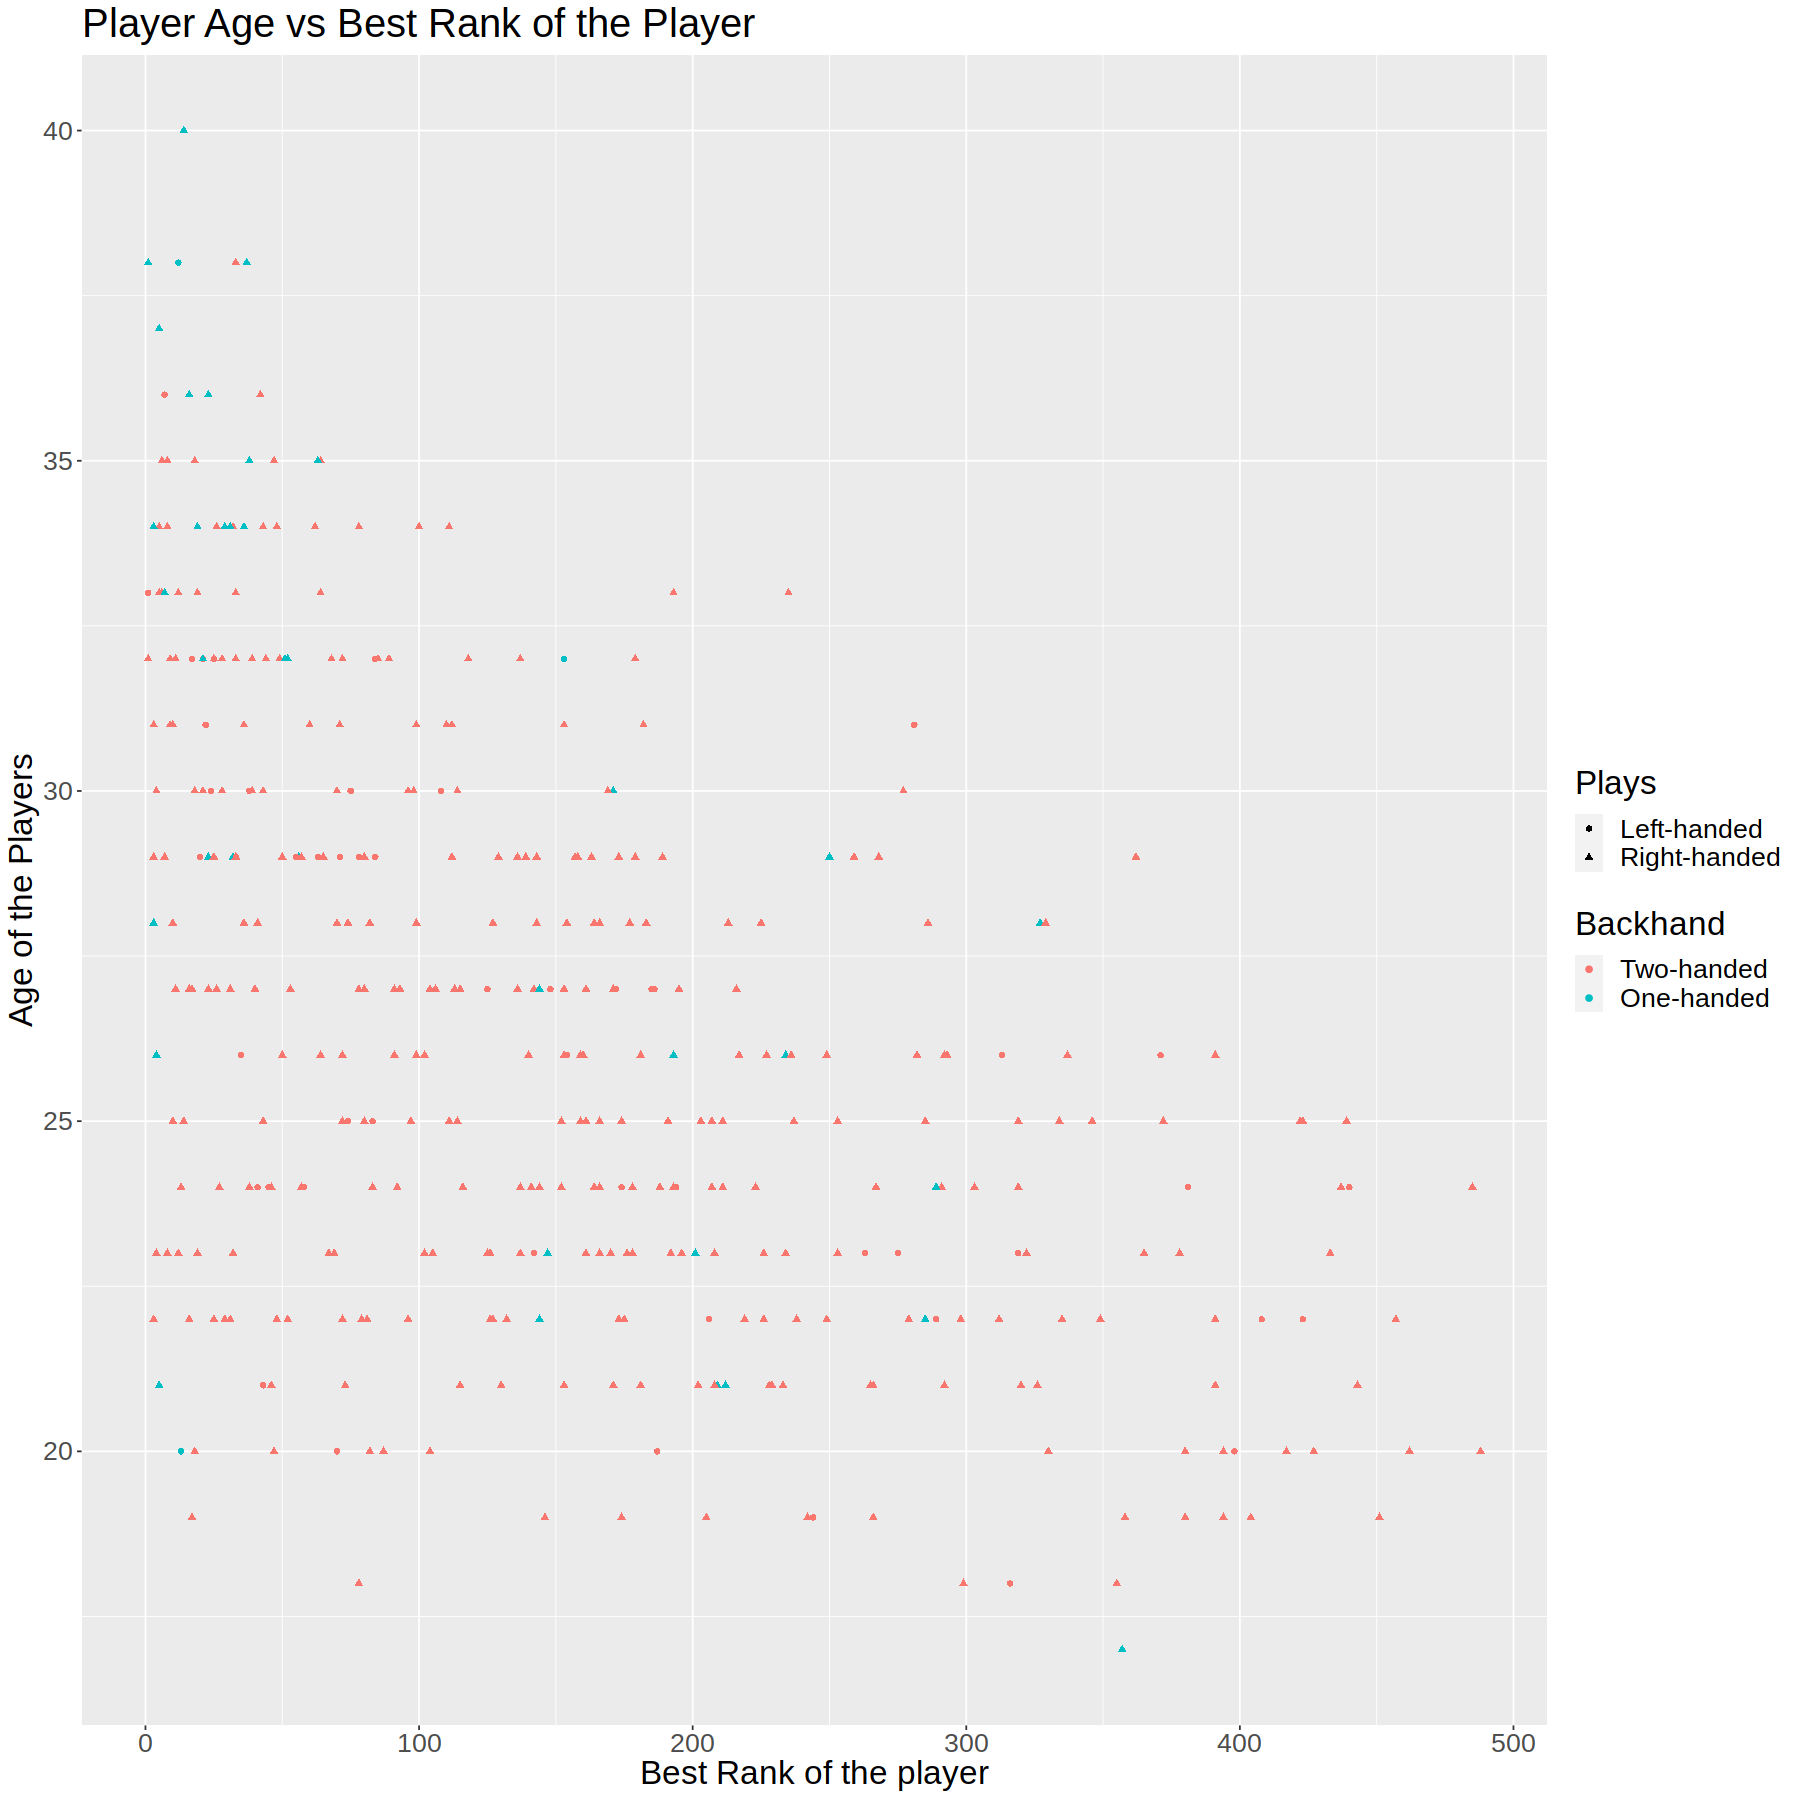

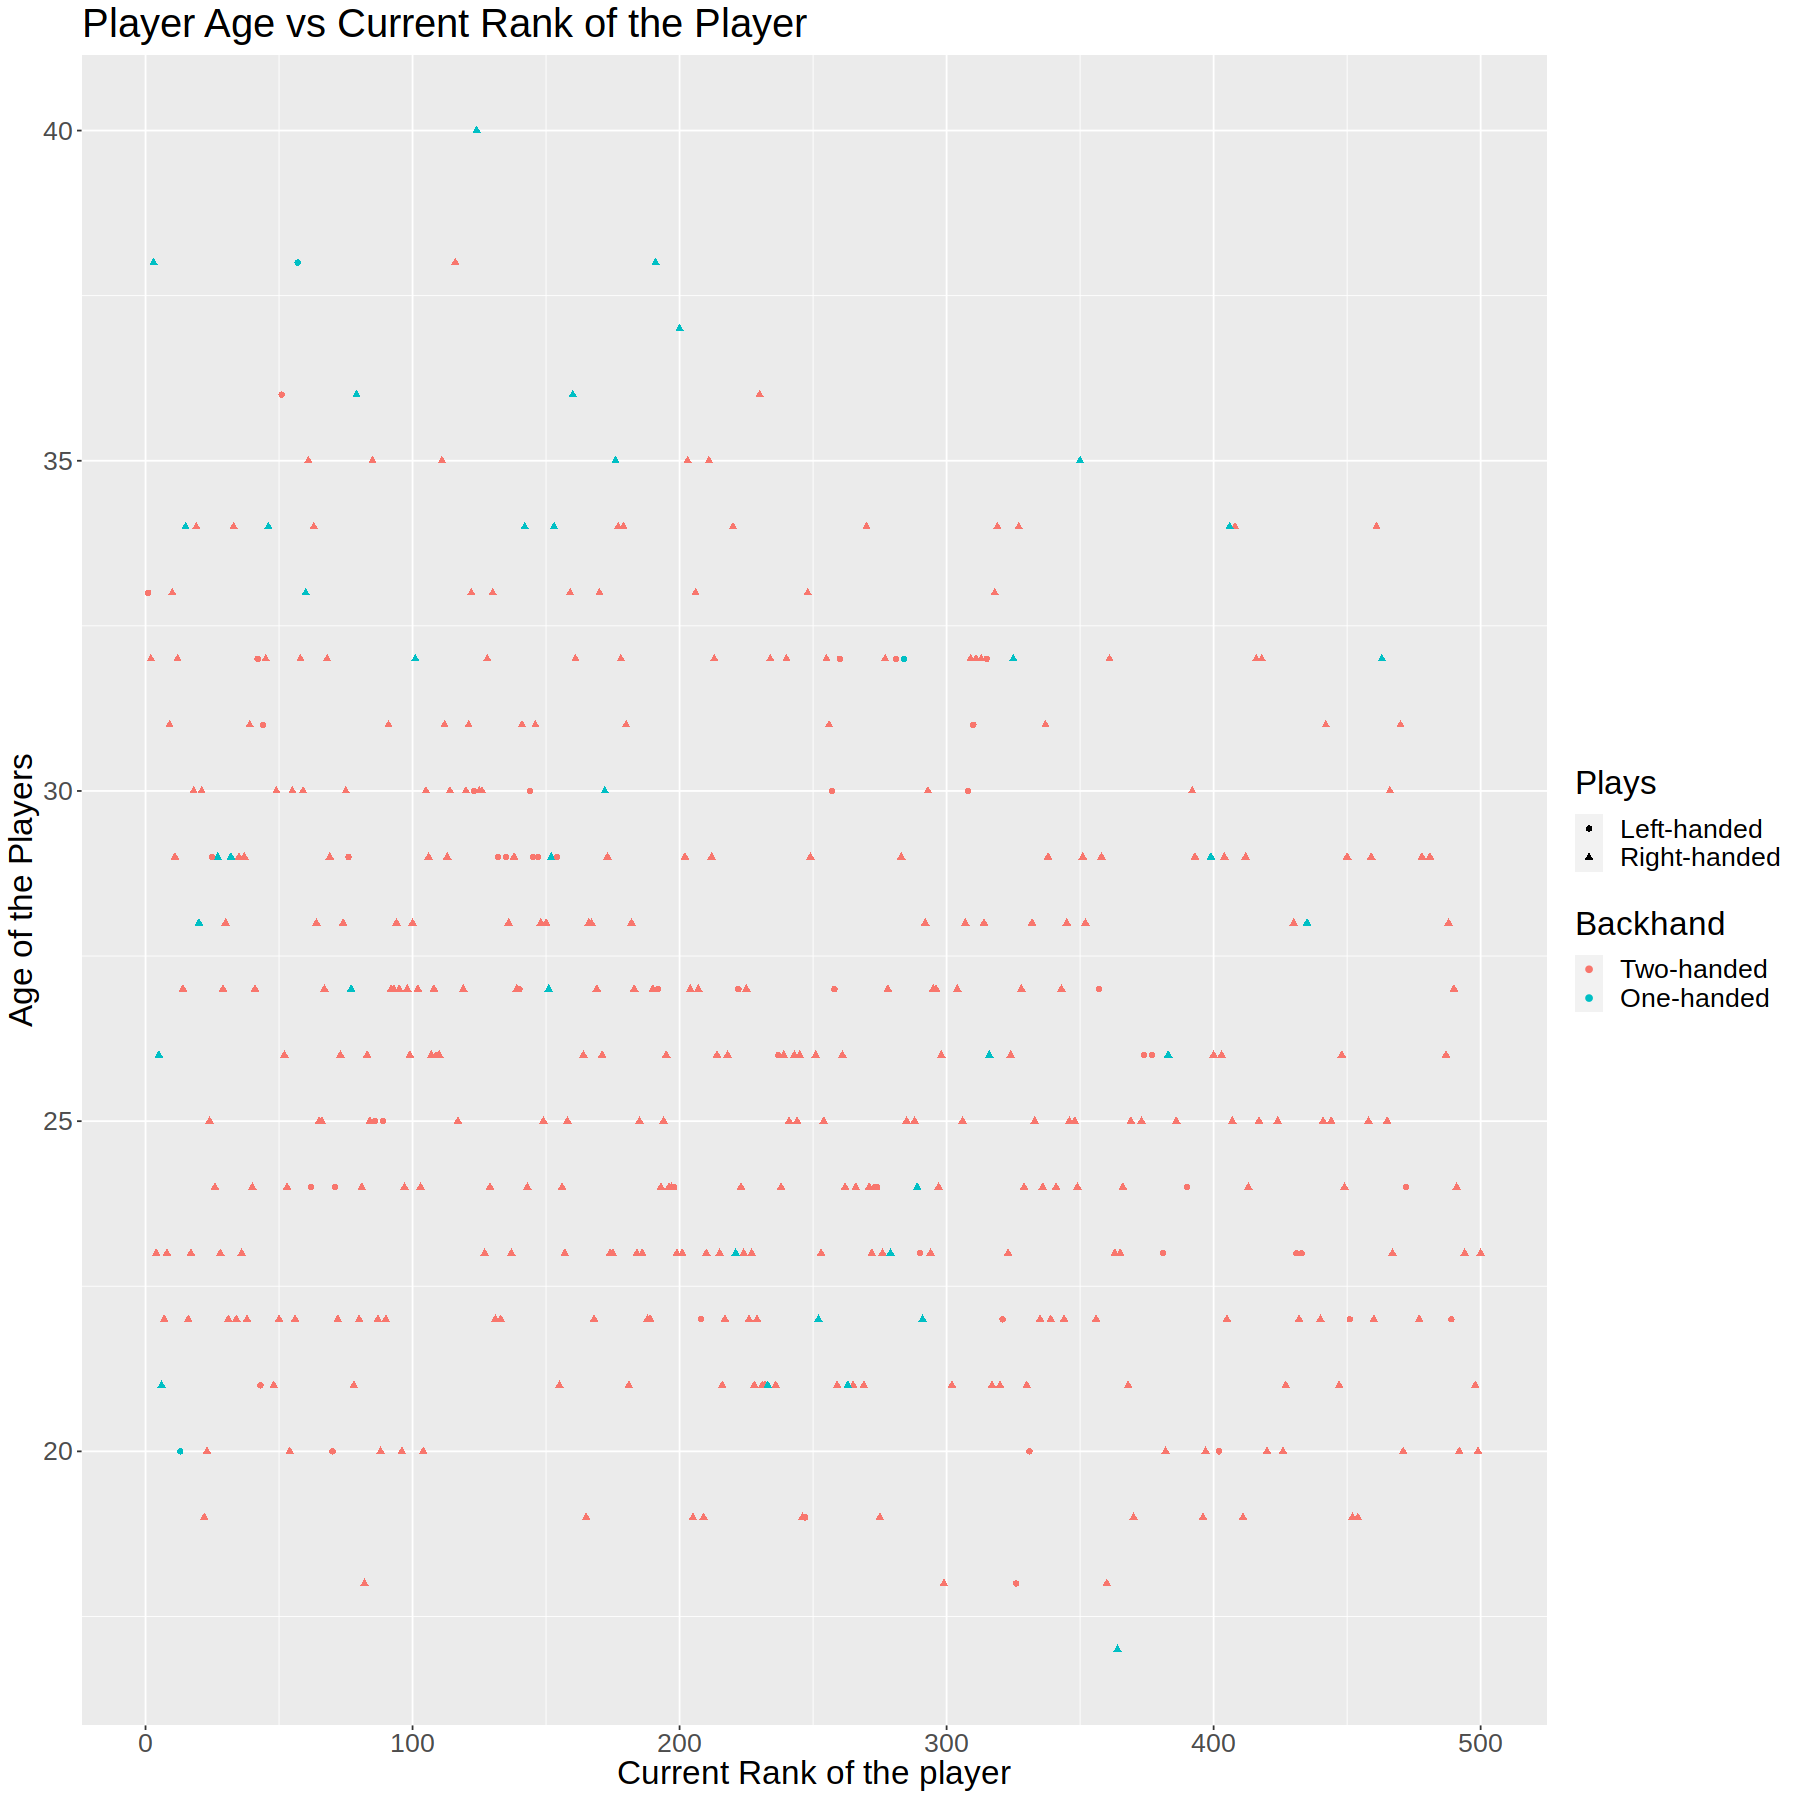

In [6]:
options(repr.plot.width = 15, repr.plot.height = 15)
Plays_table <- filter(player_data_goal, Plays != "NA", Backhand != "NA", Best_Rank != "NA", Current_Rank != "NA", Age != "NA")

Player_data_optimized <- separate(Plays_table, col = Age, into = c("Age", "Year"), sep = " ")

Player_data_optimized2 <- separate(Player_data_optimized, col = Current_Rank, into = c("Current_Rank", "N1"), sep = " ")

Player_data_optimized3 <- separate(Player_data_optimized2, col = Best_Rank, into = c("Best_Rank", "N2"), sep = " ")

Player_data_selected <- select(Player_data_optimized3, Plays, Age, Backhand, Current_Rank, Best_Rank)

player_data_better <-  mutate(Player_data_selected, Plays = as_factor(Plays), Backhand = as_factor(Backhand), Age = as.numeric(Age), Current_Rank = as.numeric(Current_Rank), Best_Rank = as.numeric(Best_Rank))
player_data_better

player_data_plot_br <- player_data_better |>
                          ggplot(aes(x = Best_Rank, y = Age, color = Backhand, shape = Plays)) +
                          geom_point() +
                          xlab("Best Rank of the player") +
                          ylab("Age of the Players") +
                          ggtitle("Player Age vs Best Rank of the Player") +
                          theme(text = element_text(size=20))
player_data_plot_cr <- player_data_better |>
                          ggplot(aes(x = Current_Rank, y = Age, color = Backhand, shape = Plays)) +
                          geom_point() +
                          xlab("Current Rank of the player") +
                          ylab("Age of the Players") +
                          ggtitle("Player Age vs Current Rank of the Player") +
                          theme(text = element_text(size=20))
player_data_plot_br
player_data_plot_cr

In [7]:
set.seed(3456) 

player_data_split <- initial_split(player_data_better, prop = 0.75, strata = Plays)

player_data_train <- training(player_data_split)

player_data_test <- testing(player_data_split)

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.8387978,5,0.006230467,Preprocessor1_Model1
roc_auc,binary,0.4868560,5,0.025489011,Preprocessor1_Model1


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7435519,5,0.012756842,Preprocessor1_Model01
2,accuracy,binary,0.7468306,5,0.010495360,Preprocessor1_Model02
3,accuracy,binary,0.8387978,5,0.006230467,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
18,accuracy,binary,0.8684153,5,0.0004371585,Preprocessor1_Model18
19,accuracy,binary,0.8684153,5,0.0004371585,Preprocessor1_Model19
20,accuracy,binary,0.8684153,5,0.0004371585,Preprocessor1_Model20


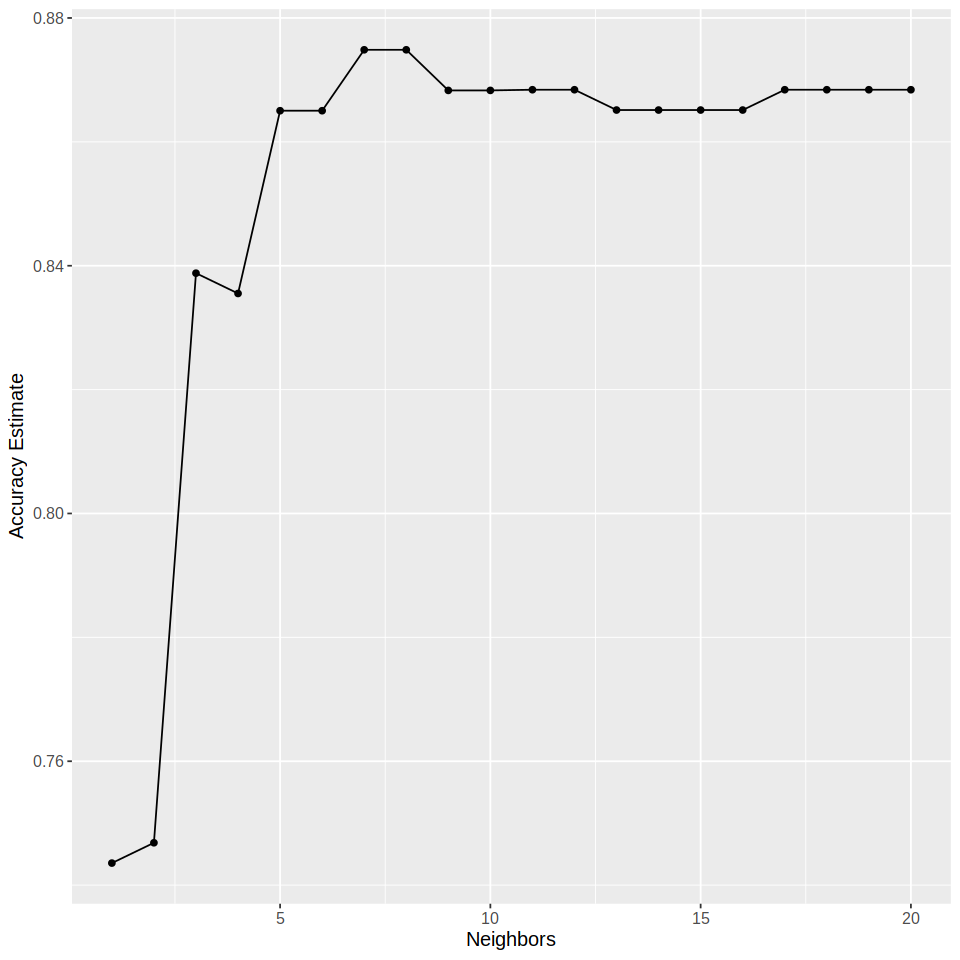

In [8]:
options(repr.plot.width = 8, repr.plot.height = 8)
set.seed(1234)

player_recipe <- recipe(Plays ~ Best_Rank + Age, data = player_data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(knn_spec) |>
  fit(data = player_data_train)

player_vfold <- vfold_cv(player_data_train, v = 5, strata = Plays)

player_recipe2 <- recipe(Plays ~ Best_Rank + Age, 
                        data = player_data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_fit2 <- workflow() |>
  add_recipe(player_recipe2) |>
  add_model(knn_spec) |>
  fit_resamples(resamples = player_vfold)

knn_fit2 |> 
  collect_metrics()

knn_spec2 <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 20))

knn_results <- workflow() |>
  add_recipe(player_recipe2) |>
  add_model(knn_spec2) |>
  tune_grid(resamples = player_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")
accuracies

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k

In [9]:
set.seed(4761)
knn_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
       set_engine("kknn") |>
       set_mode("classification")

player_fit <- workflow() |>
       add_recipe(player_recipe2) |>
       add_model(knn_spec_final) |>
       fit(data = player_data_train)
new_player <- tibble(Age = 25, Best_Rank = 125, Current_Rank = 200)
player_test_predictions <- predict(player_fit , new_player)
player_test_predictions

.pred_class
<fct>
Right-handed


### Discussion:

### References

Loffing, F., Hagemann, N., & Strauss, B. (2009). The Serve in Professional Men’s Tennis: Effects of Players’ Handedness. International Journal of Performance Analysis in Sport, 9(2), 255–274.
https://doi.org/10.1080/24748668.2009.11868482

Breznik, K. (2013). On the gender effects of handedness in professional tennis. Journal of Sports Science and Medicine, 12(2), 346–353.
Nadal, R., Carlin, J. (2012). Rafa: My story. Sphere.
